#Create a Cloud SQL instance with MySQL Server

Create your MySQL instance in CloudSQL. Then go to "Connections" and add a network. Everybody from the internet can connect through the internet. Later we allow access to our instance via **SSL only**.

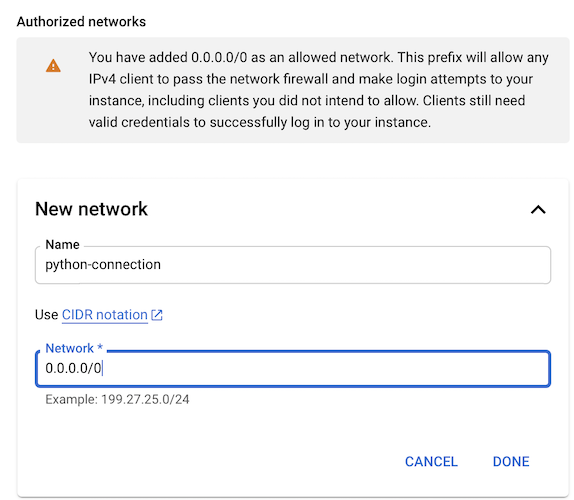

In the same window scrolling down we will see the security options

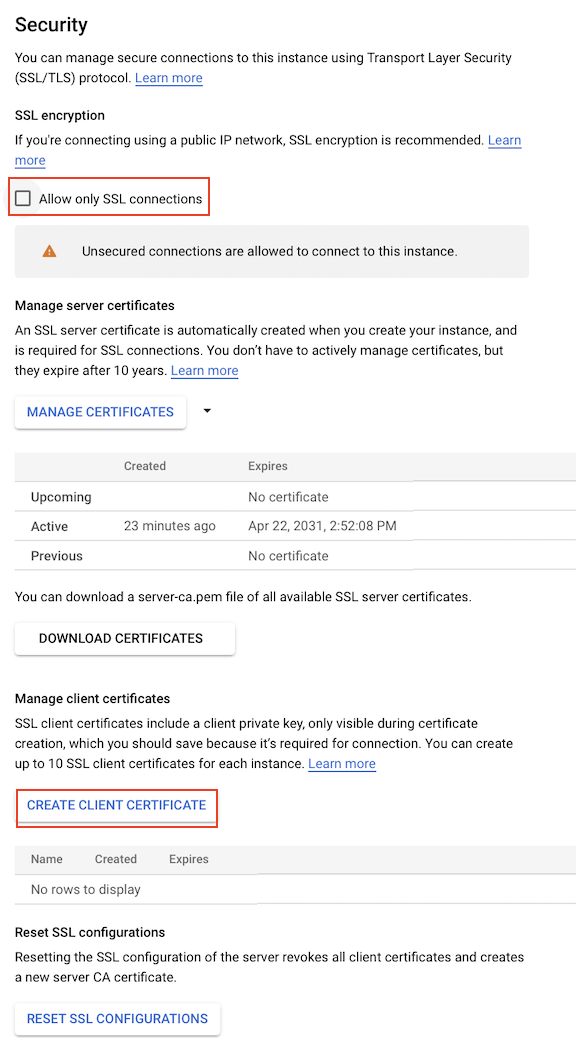

#Bringing files required

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import storage

In [ ]:
project_id = 'hazel-env-310501'

In [ ]:
client = storage.Client(project=project_id)
bucket = client.get_bucket('hazel-env-310501-data')
blob1 = bucket.get_blob('client-cert-2.pem')
blob2 = bucket.get_blob('client-key-2.pem')
blob3 = bucket.get_blob('server-ca-2.pem')

In [ ]:
cert1 = blob1.download_to_filename('client-cert-2.pem')

In [ ]:
cert2 = blob2.download_to_filename('client-key-2.pem')

In [ ]:
cert3 = blob3.download_to_filename('server-ca-2.pem')

In [ ]:
!wget -L https://raw.githubusercontent.com/mtpradoc/CloudSQL/main/patient_details.sql

#Access the Cloud SQL Instance

In [ ]:
pip install mysql-connector-python

In [ ]:
import mysql.connector

from mysql.connector.constants import ClientFlag

config = {
    'user': 'root',
    'password': 'root',
    'host': '34.121.4.126',
    'database': 'testdb',
    'client_flags': [ClientFlag.SSL],
    'ssl_ca': './server-ca-2.pem',
    'ssl_cert': './client-cert-2.pem',
    'ssl_key': './client-key-2.pem',
}

In [ ]:
conn = mysql.connector.connect(**config)

#Create Database in CloudSQL MySQL Instance


In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute('CREATE DATABASE testdb')

In [ ]:
conn.close()

#Let's create our table and insert our data

a. Uploading the creation and insertion of data from a file

In [ ]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

for line in open("patient_details.sql"):
    cursor.execute(line)
    conn.commit()
#Closing the connection
conn.close()

#Let's query our *data*

In [ ]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Retrieving single row
sql = '''SELECT * from patient_details'''

#Executing the query
cursor.execute(sql)

#Fetching 1st row from the table
result = cursor.fetchone()

print(result)

conn.close()

(1465, 'Aarika Drynan', 69, 'F', 0, 0, 1)
